In [2]:
#Packages needed
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

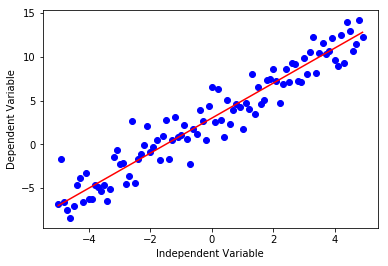

In [3]:
#Creating random data
x = np.arange(-5.0, 5.0, 0.1)
y = 2*(x) +3
y_noise= 2*np.random.normal(size=x.size)
y_data=y+y_noise

#Plot figure (figsize=(8.6))
plt.plot(x,y_data, 'bo')
plt.plot(x,y,'-r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

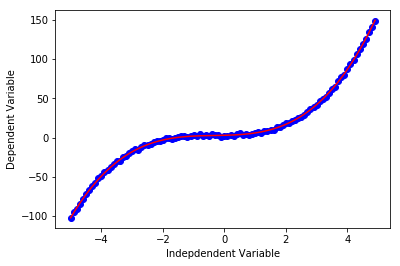

In [6]:
#Cubic function graph
x = np.arange(-5.0,5.0,0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3)+ 1*(x**2)+ 1*x +3
y_noise=np.random.normal(size=x.size)
y_data=y+y_noise

plt.plot(x, y_data,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

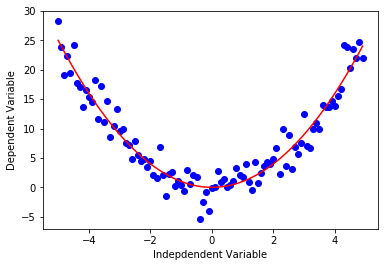

In [7]:
#Quadratic data
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

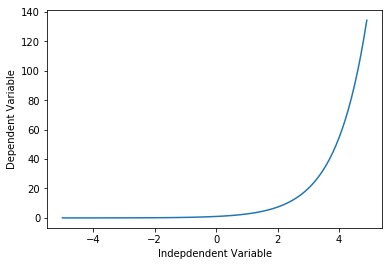

In [8]:
#Exponential data
X = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


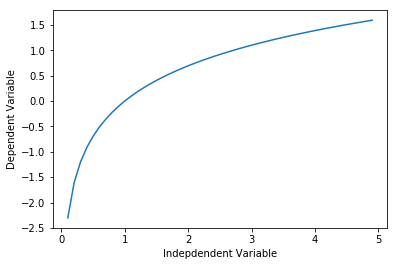

In [9]:
#Logarithmic data
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

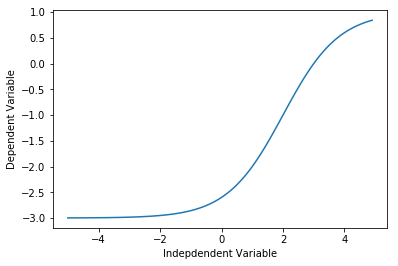

In [10]:
#Sigmodial or logistic data
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [11]:
#Non linear regrassion example

#Downloading the data
import wget
url='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv'
wget.download(url, 'C:/Users/Maikol Cerda/Desktop/Python_exercise/12.- IBM machine learning with python/Videos/china_gdp.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Maikol Cerda/Desktop/Python_exercise/12.- IBM machine learning with python/Videos/china_gdp.csvli0sti_j.tmp'

In [12]:
#reading the data: China GPS
df = pd.read_csv('C:/Users/Maikol Cerda/Dropbox/2.-DATA SCIENCE COURSES/0.- COURSERA/1.- IBM machine learning with python/Videos/china_gdp.csv')

# take a look at the dataset
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


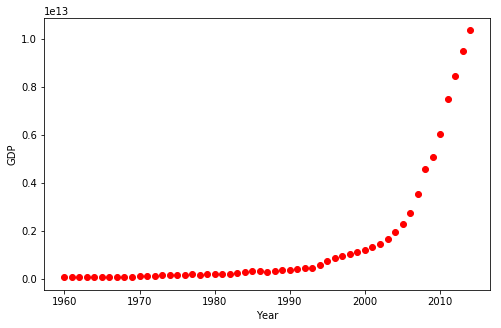

In [17]:
#Ploting relationship year vs gdp
plt.figure(figsize=(8,5))
x_data, y_data = (df['Year'].values, df['Value'].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

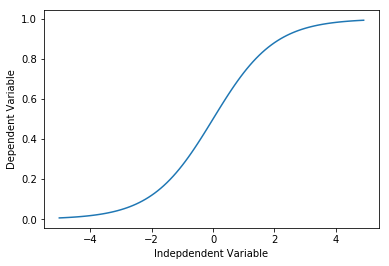

In [11]:
#Choosing a model
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [18]:
#Building the model
def sigmoid(x, Beta_1, Beta_2):
    y= 1/(1+np.exp(-Beta_1*(x-Beta_2)))
    return y

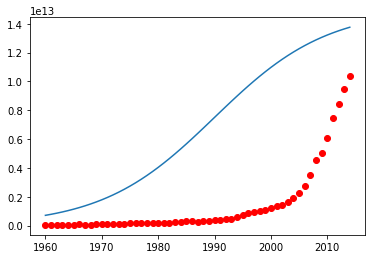

In [19]:
#Sample sigmoid line which can fit the data
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [20]:
# Lets normalize our data
xdata= x_data/max(x_data)
ydata= y_data/max(y_data)

In [21]:
#Finding the parameters
from scipy.optimize import curve_fit
popt, pcov =curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print("beta_1 =%f, beta_2 = %f" % (popt[0], popt[1]))

beta_1 =690.451711, beta_2 = 0.997207


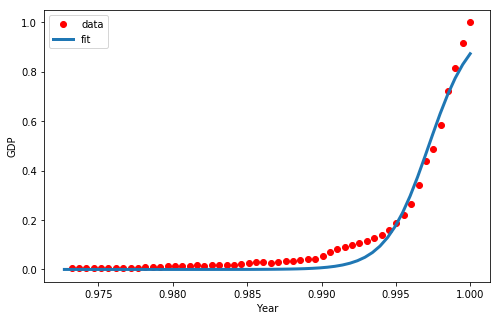

In [22]:
#Ploting our results 
x=np.linspace(1960,2015, 55)
x=x/max(x)
plt.figure(figsize=(8,5))
y=sigmoid(x, *popt)

plt.plot(xdata,ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [17]:
#Accuracy of the model
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

C:\Users\Maikol Cerda\AppData\Roaming\Python\Python37\site-packages\scipy\optimize\minpack.py:799: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Mean absolute error: 0.26
Residual sum of squares (MSE): 0.18
R2-score: -1665403232689752613886830915639836672.00
